In [1]:
# EDA Case Study 
# Univariate analysis
# Answers 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDADF = pd.read_csv("loan.csv", encoding = "ISO-8859-1")
EDADF.isnull().sum()
EDADF.drop(EDADF.iloc[:, 53:111],axis=1, inplace=True)
EDADF = EDADF.drop(['mths_since_last_major_derog', 'next_pymnt_d'], axis=1)

C:\Users\baranitharan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
#Default rate computation by dividing the total number of delinquency in the last 2 years divided by total account
EDADF['Default_rate']=round(EDADF['delinq_2yrs']/EDADF['total_acc'],2)
EDADF['Default_rate'].describe()

count    39717.000000
mean         0.007671
std          0.028834
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.600000
Name: Default_rate, dtype: float64

In [59]:
print(len(EDADF.Default_rate.unique()))

44


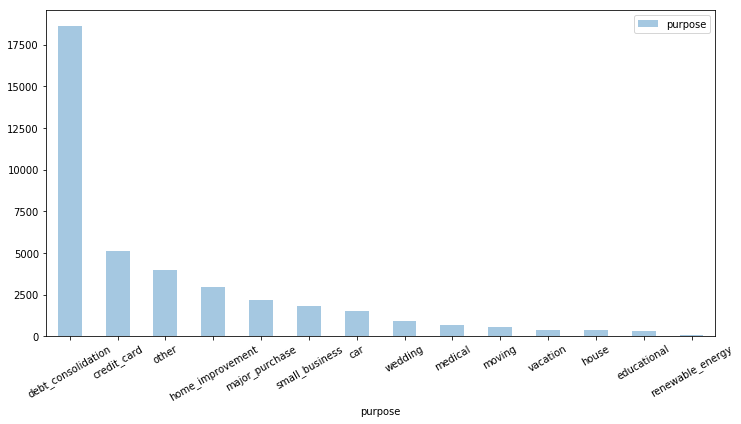

In [9]:
#uni-variate analysis on the unordered categorical values on the purpose 
func = lambda x: 100*x.count()/EDADF.shape[0]
purpose_wise_total = EDADF.groupby('purpose')['purpose'].count().sort_values(ascending=False)
p=purpose_wise_total.plot(x='purpose',kind='bar', figsize=[12,6], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

In [60]:
EDADF['Default_rate'].describe()

count    39717.000000
mean         0.007671
std          0.028834
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.600000
Name: Default_rate, dtype: float64

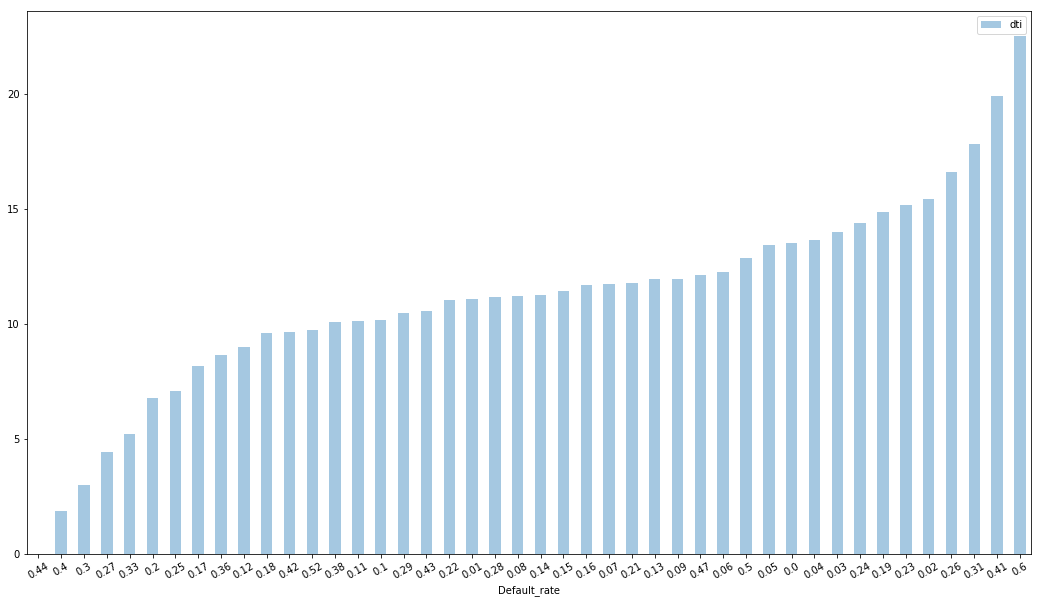

In [61]:
rate_wise_total = EDADF.groupby('Default_rate')['dti'].median().sort_values(ascending=True)
p=rate_wise_total.plot(x='dti',y='Default_rate',kind='bar', figsize=[18,10], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

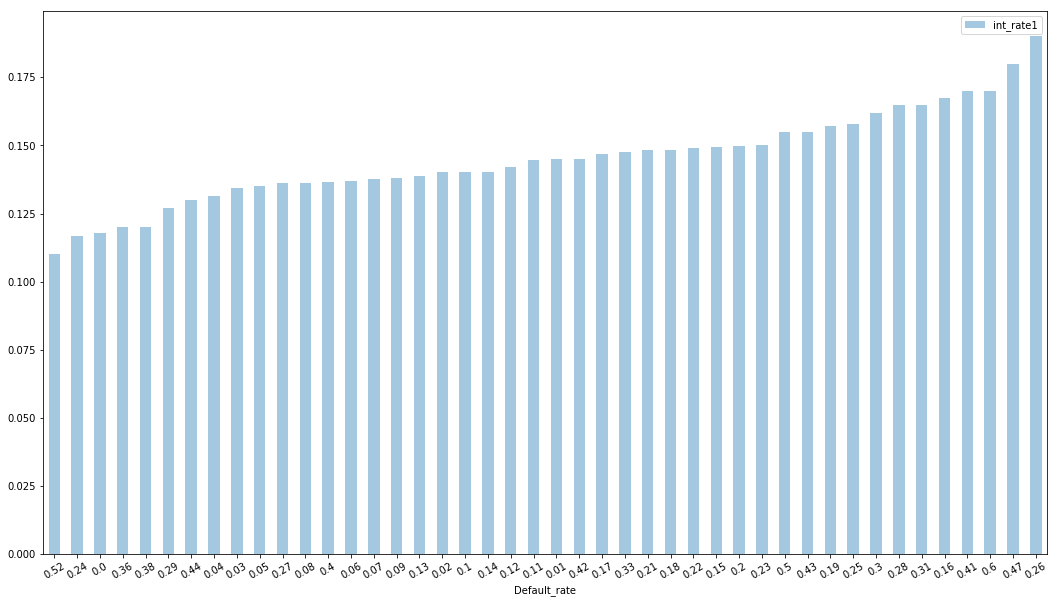

In [62]:
EDADF['int_rate1']= round(EDADF['int_rate'].str.rstrip('%').astype('float')/100.0,2)
intrate_wise_total = EDADF.groupby('Default_rate')['int_rate1'].mean().sort_values(ascending=True)
p=intrate_wise_total.plot(x='int_rate1',y='Default_rate',kind='bar', figsize=[18,10], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

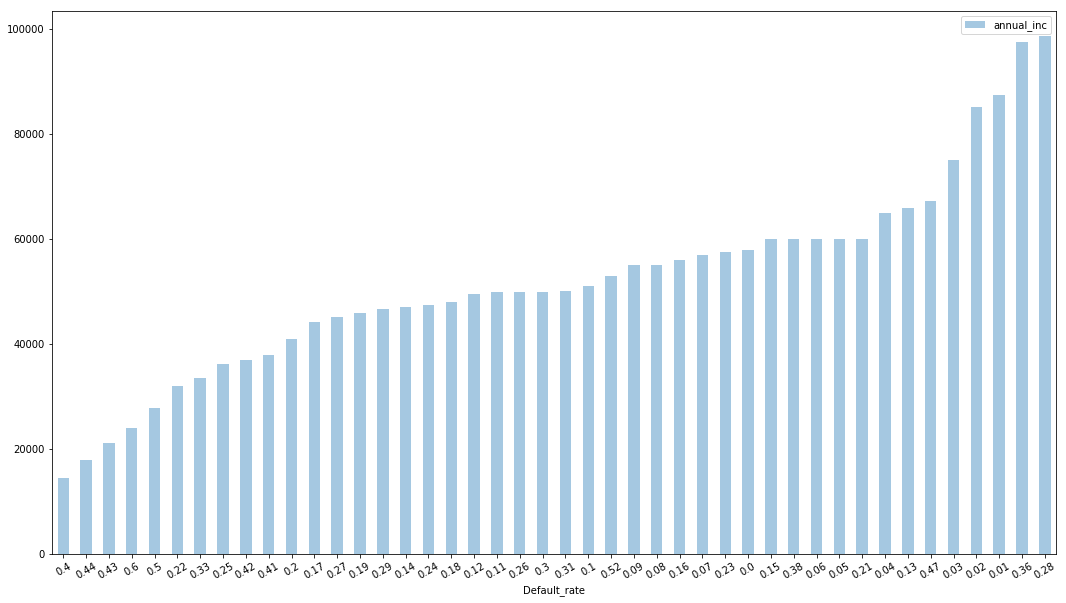

In [63]:
anninc_wise_total = EDADF.groupby('Default_rate')['annual_inc'].median().sort_values(ascending=True)
p=anninc_wise_total.plot(x='annual_inc',y='Default_rate',kind='bar', figsize=[18,10], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

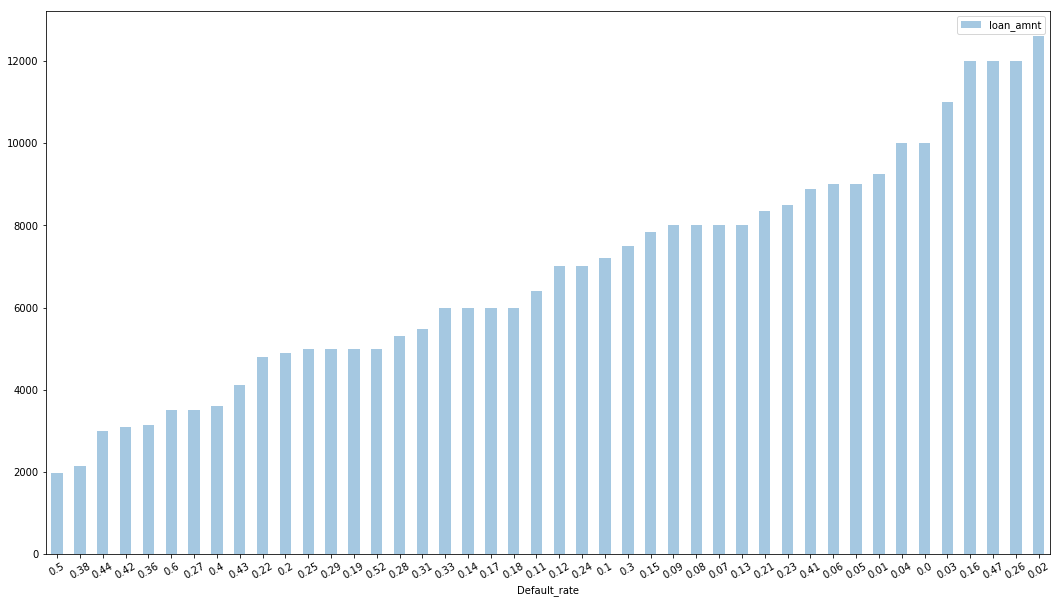

In [64]:
anninc_wise_total = EDADF.groupby('Default_rate')['loan_amnt'].median().sort_values(ascending=True)
p=anninc_wise_total.plot(x='loan_amnt',y='Default_rate',kind='bar', figsize=[18,10], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

In [66]:
EDADF['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

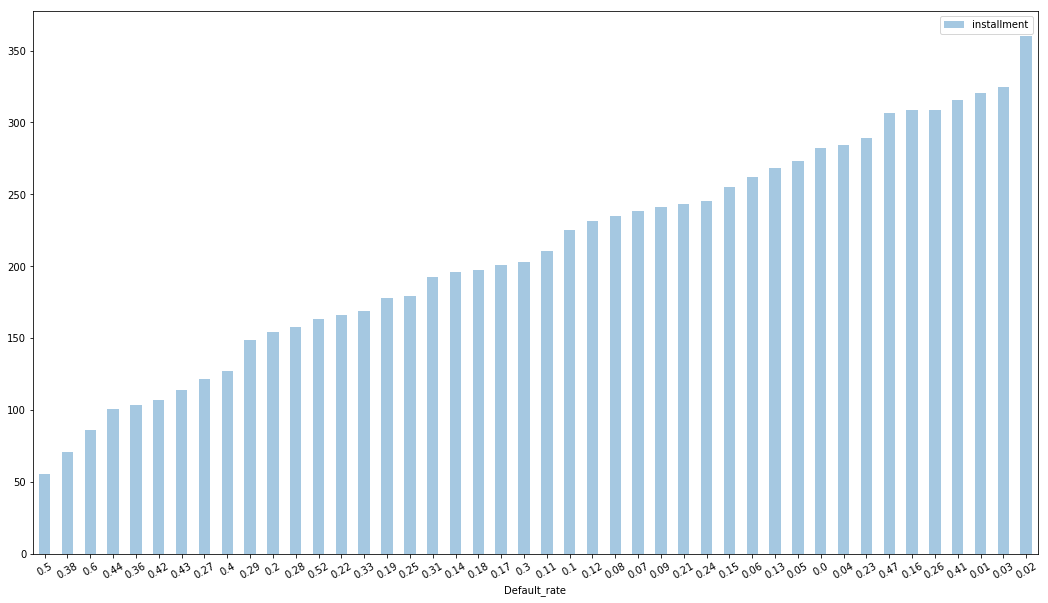

In [67]:
anninc_wise_total = EDADF.groupby('Default_rate')['installment'].median().sort_values(ascending=True)
p=anninc_wise_total.plot(x='installment',y='Default_rate',kind='bar', figsize=[18,10], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

In [22]:
dti_wise_mean=EDADF.groupby('Default_rate')['dti'].median().sort_values(ascending=False)
print(dti_wise_mean)

Default_rate
0.35    23.100
0.03    20.280
1.40    19.930
0.19    18.335
0.04    17.635
2.00    17.415
0.21    17.350
0.31    16.990
1.50    16.950
0.70    16.610
0.06    15.770
0.15    15.610
0.42    15.280
0.05    15.125
0.07    15.000
0.27    14.695
0.08    14.670
0.09    14.660
0.11    14.230
0.18    14.180
0.38    13.695
0.78    13.540
0.00    13.500
0.44    13.390
0.36    13.155
0.10    13.010
0.12    12.945
0.13    12.720
0.16    12.590
0.57    12.230
1.14    12.110
0.14    12.050
0.43    11.970
0.80    11.680
0.22    11.605
0.75    11.555
0.30    11.530
0.24    11.440
0.29    11.340
0.60    11.145
0.17    11.105
0.25    10.350
0.40    10.000
0.71     9.845
0.20     9.830
0.69     9.740
0.56     9.380
1.00     9.000
0.45     8.870
1.29     8.820
2.50     8.390
0.23     8.365
0.33     7.970
1.67     7.580
0.67     6.725
0.50     6.170
0.83     4.570
0.88     4.150
1.33     2.250
Name: dti, dtype: float64


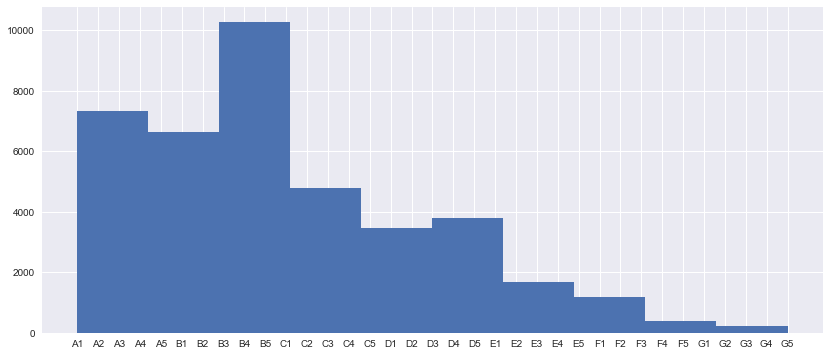

In [24]:
#uni-variate analysis on the unordered categorical values on the sub-grade
p=EDADF['sub_grade'].hist(figsize=[14,6])
plt.show()

In [25]:
state_wise_total=EDADF.groupby('addr_state')['id'].count().sort_values(ascending=False)
print(state_wise_total)

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: id, dtype: int64


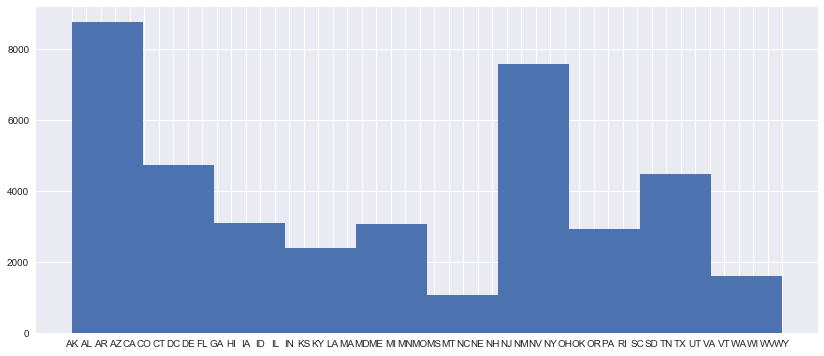

In [26]:
#uni-variate analysis on the unordered categorical values on the addr_state
p=EDADF['addr_state'].hist(figsize=[14,6])
plt.show()

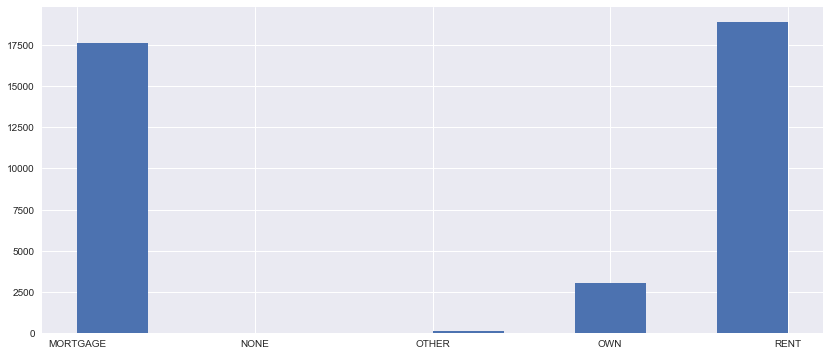

In [27]:
#uni-variate analysis on the unordered categorical values on the addr_state
p=EDADF['home_ownership'].hist(figsize=[14,6])
plt.show()

In [28]:
EDADF['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

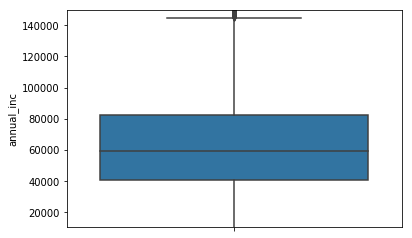

In [89]:
sns.boxplot(y=EDADF['annual_inc'])
#plt.yscale('log')
plt.ylim(10000, 150000)
plt.show()

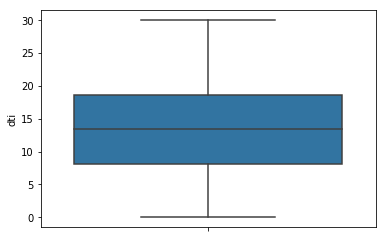

In [93]:
sns.boxplot(y=EDADF['dti'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

In [98]:
EDADF['int_rate1'].describe()

count    39717.000000
mean         0.120112
std          0.037172
min          0.050000
25%          0.090000
50%          0.120000
75%          0.150000
max          0.250000
Name: int_rate1, dtype: float64

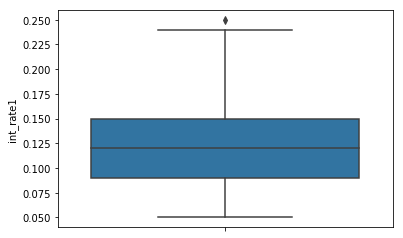

In [96]:
sns.boxplot(y=EDADF['int_rate1'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

In [104]:
EDADF['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

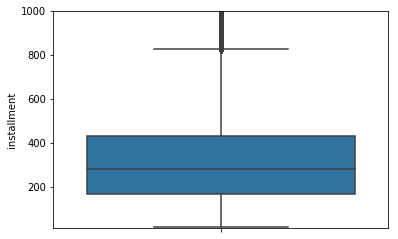

In [103]:
sns.boxplot(y=EDADF['installment'])
#plt.yscale('log')
plt.ylim(10, 1000)
plt.show()

In [135]:
EDADF.groupby('delinq_2yrs')['id'].count().sort_values(ascending=False)

delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
11        1
9         1
Name: id, dtype: int64

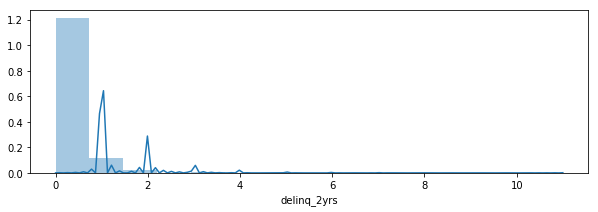

In [147]:
plt.subplots(1,1,figsize=(10, 3))
sns.distplot(EDADF['delinq_2yrs'],bins=15)
#plt.yscale('log')
#plt.ylim(10, 1000)
plt.show()

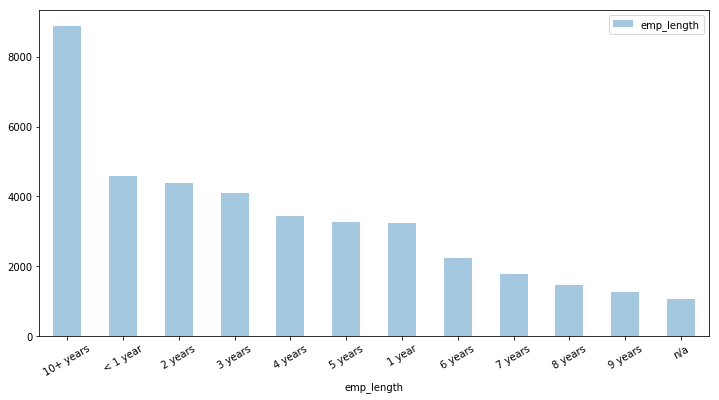

In [149]:
func = lambda x: 100*x.count()/EDADF.shape[0]
empl_wise_total = EDADF.groupby('emp_length')['emp_length'].count().sort_values(ascending=False)
p=empl_wise_total.plot(x='emp_length',kind='bar', figsize=[12,6], alpha=.4, legend=True) # alpha for transparency
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

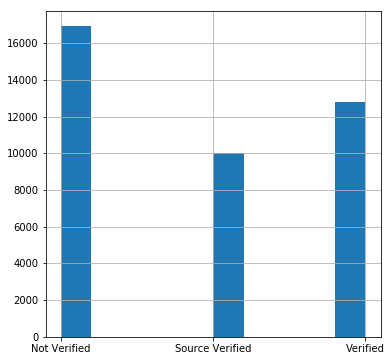

In [152]:
p=EDADF['verification_status'].hist(figsize=[6,6])
plt.show()

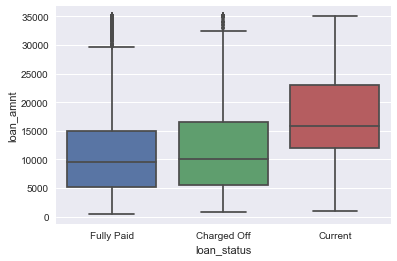

In [33]:
EDADF.groupby('loan_status')['loan_amnt'].median().sort_values(ascending=False)
sns.boxplot(x='loan_status', y='loan_amnt', data=EDADF)
plt.show()

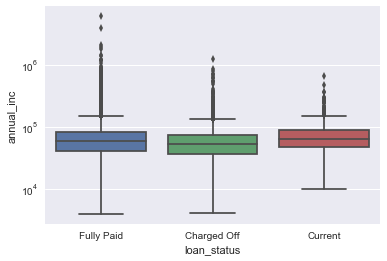

In [42]:
EDADF.groupby('loan_status')['annual_inc'].median().sort_values(ascending=False)
sns.boxplot(x='loan_status', y='annual_inc', data=EDADF)
plt.yscale('log')
plt.show()

In [ ]:
EDADF_sub = pd.read_csv("loan-eda.csv", encoding = "ISO-8859-1")
sns.heatmap(EDADF_sub, annot=True,
           xticklabels=EDADF.columns.values,
           yticklabels=EDADF.columns.values)
plt.show()